In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import nltk
import datetime
import spacy
import en_core_web_lg
import preprocessor as p
import wordninja
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from langdetect import detect_langs
from textblob import TextBlob

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
nlp = en_core_web_lg.load()

In [3]:
trump = pd.read_excel('p_trump.xlsx').dropna(how='all')
trump.head()

,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,text,text_html,links,...,has_media,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users
0,markknoller,Mark Knoller,31127446.0,1.271820e+18,/markknoller/status/1271819795634274305,2020-06-13 15:00:43,1.592060e+09,"""You became brothers & sisters pledging allegi...","<p class=""TweetTextSize TweetTextSize--normal ...",[],...,1.0,['https://pbs.twimg.com/media/EaZpVXUWkAE3nHN....,NaN,6504.0,1836.0,949.0,1.0,0.0,NaN,[]
2,markknoller,Mark Knoller,31127446.0,1.271817e+18,/markknoller/status/1271817424980127744,2020-06-13 14:51:17,1.592060e+09,Pres begins Commencement Address to graduating...,"<p class=""TweetTextSize TweetTextSize--normal ...",[],...,1.0,['https://pbs.twimg.com/media/EaZnGUDWsAYYMLe....,NaN,4803.0,1201.0,371.0,1.0,0.0,NaN,[]
4,markknoller,Mark Knoller,31127446.0,1.271813e+18,/markknoller/status/1271812648154382343,2020-06-13 14:32:19,1.592059e+09,Pres escorted on stage and salutes as Star Spa...,"<p class=""TweetTextSize TweetTextSize--normal ...",[],...,1.0,['https://pbs.twimg.com/media/EaZi1D9WsAAhcBJ....,NaN,6509.0,1519.0,473.0,1.0,0.0,NaN,[]
6,markknoller,Mark Knoller,31127446.0,1.271838e+18,/markknoller/status/1271837570419306496,2020-06-13 16:11:21,1.592065e+09,Pres Trump and Gen Williams giving more than 5...,"<p class=""TweetTextSize TweetTextSize--normal ...",[],...,1.0,['https://pbs.twimg.com/media/EaZ5dGjWsAEOtjt....,NaN,6459.0,1633.0,436.0,1.0,0.0,NaN,[]
8,realDonaldTrump,Donald J. Trump,25073877.0,1.272007e+18,/realDonaldTrump/status/1272007354679164928,2020-06-14 03:26:00,1.592105e+09,A great day at West Point!https://twitter.com/...,"<p class=""TweetTextSize TweetTextSize--normal ...",['https://twitter.com/realdonaldtrump/status/1...,...,0.0,[],NaN,29442.0,6341.0,4039.0,1.0,0.0,NaN,[]


In [4]:
trump.columns

Index(['screen_name', 'username', 'user_id', 'tweet_id', 'tweet_url',
       'timestamp', 'timestamp_epochs', 'text', 'text_html', 'links',
       'hashtags', 'has_media', 'img_urls', 'video_url', 'likes', 'retweets',
       'replies', 'is_replied', 'is_reply_to', 'parent_tweet_id',
       'reply_to_users'],
      dtype='object')

In [5]:
trump_tweets = trump[['username','text','timestamp','likes','retweets']].reset_index(drop=True)
trump_tweets.head()

,username,text,timestamp,likes,retweets
0,Mark Knoller,"""You became brothers & sisters pledging allegi...",2020-06-13 15:00:43,6504.0,1836.0
1,Mark Knoller,Pres begins Commencement Address to graduating...,2020-06-13 14:51:17,4803.0,1201.0
2,Mark Knoller,Pres escorted on stage and salutes as Star Spa...,2020-06-13 14:32:19,6509.0,1519.0
3,Mark Knoller,Pres Trump and Gen Williams giving more than 5...,2020-06-13 16:11:21,6459.0,1633.0
4,Donald J. Trump,A great day at West Point!https://twitter.com/...,2020-06-14 03:26:00,29442.0,6341.0


In [6]:
p.set_options(p.OPT.URL, p.OPT.EMOJI,p.OPT.RESERVED,p.OPT.SMILEY)

In [7]:
trump_tweets['text_clean'] = [re.sub(r'[^\w\s]','',p.clean(i).lower()) for i in trump_tweets.text]
trump_tweets.head()

,username,text,timestamp,likes,retweets,text_clean
0,Mark Knoller,"""You became brothers & sisters pledging allegi...",2020-06-13 15:00:43,6504.0,1836.0,you became brothers sisters pledging allegian...
1,Mark Knoller,Pres begins Commencement Address to graduating...,2020-06-13 14:51:17,4803.0,1201.0,pres begins commencement address to graduating...
2,Mark Knoller,Pres escorted on stage and salutes as Star Spa...,2020-06-13 14:32:19,6509.0,1519.0,pres escorted on stage and salutes as star spa...
3,Mark Knoller,Pres Trump and Gen Williams giving more than 5...,2020-06-13 16:11:21,6459.0,1633.0,pres trump and gen williams giving more than 5...
4,Donald J. Trump,A great day at West Point!https://twitter.com/...,2020-06-14 03:26:00,29442.0,6341.0,a great day at west point


In [8]:
polarity = []
for i in trump_tweets.text_clean:
    statement = TextBlob(i)
    sentiment = statement.sentiment.polarity 
    polarity.append(sentiment)

In [9]:
trump_tweets['polarity'] = polarity
trump_tweets.head()

,username,text,timestamp,likes,retweets,text_clean,polarity
0,Mark Knoller,"""You became brothers & sisters pledging allegi...",2020-06-13 15:00:43,6504.0,1836.0,you became brothers sisters pledging allegian...,0.15
1,Mark Knoller,Pres begins Commencement Address to graduating...,2020-06-13 14:51:17,4803.0,1201.0,pres begins commencement address to graduating...,0.80
2,Mark Knoller,Pres escorted on stage and salutes as Star Spa...,2020-06-13 14:32:19,6509.0,1519.0,pres escorted on stage and salutes as star spa...,0.00
3,Mark Knoller,Pres Trump and Gen Williams giving more than 5...,2020-06-13 16:11:21,6459.0,1633.0,pres trump and gen williams giving more than 5...,0.50
4,Donald J. Trump,A great day at West Point!https://twitter.com/...,2020-06-14 03:26:00,29442.0,6341.0,a great day at west point,0.80


In [10]:
trudeau = pd.read_excel('p_trudeau.xlsx').dropna(how='all')
trudeau.head()

,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,text,text_html,links,...,has_media,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users
0,JustinTrudeau,Justin Trudeau,14260960.0,1.271847e+18,/JustinTrudeau/status/1271847057779822592,2020-06-13 16:49:03,1.592067e+09,"Still the champs! A lot can happen in a year, ...","<p class=""TweetTextSize TweetTextSize--normal ...",['https://twitter.com/raptors/status/113937969...,...,0.0,[],NaN,8194.0,1121.0,221.0,1.0,0.0,NaN,[]
2,JustinTrudeau,Justin Trudeau,14260960.0,1.271847e+18,/JustinTrudeau/status/1271847023344603136,2020-06-13 16:48:54,1.592067e+09,Toujours les champions! Bien des choses peuven...,"<p class=""TweetTextSize TweetTextSize--normal ...",['https://twitter.com/raptors/status/113937969...,...,0.0,[],NaN,566.0,56.0,26.0,1.0,0.0,NaN,[]
4,JustinTrudeau,Justin Trudeau,14260960.0,1.271639e+18,/JustinTrudeau/status/1271638879179866112,2020-06-13 03:01:49,1.592017e+09,COVID-19 is a global crisis that demands a glo...,"<p class=""TweetTextSize TweetTextSize--normal ...",['https://pm.gc.ca/en/news/readouts/2020/06/12...,...,0.0,[],NaN,800.0,151.0,225.0,1.0,0.0,NaN,[]
6,JustinTrudeau,Justin Trudeau,14260960.0,1.271639e+18,/JustinTrudeau/status/1271638797747466240,2020-06-13 03:01:29,1.592017e+09,La COVID-19 est une crise mondiale qui exige u...,"<p class=""TweetTextSize TweetTextSize--normal ...",['https://pm.gc.ca/fr/nouvelles/comptes-rendus...,...,0.0,[],NaN,190.0,30.0,20.0,1.0,0.0,NaN,[]
8,JustinTrudeau,Justin Trudeau,14260960.0,1.271613e+18,/JustinTrudeau/status/1271612693506658305,2020-06-13 01:17:46,1.592011e+09,"On our call earlier this evening, President @N...","<p class=""TweetTextSize TweetTextSize--normal ...",['https://pm.gc.ca/en/news/readouts/2020/06/12...,...,0.0,[],NaN,478.0,92.0,108.0,1.0,0.0,NaN,[]


In [11]:
trudeau.columns

Index(['screen_name', 'username', 'user_id', 'tweet_id', 'tweet_url',
       'timestamp', 'timestamp_epochs', 'text', 'text_html', 'links',
       'hashtags', 'has_media', 'img_urls', 'video_url', 'likes', 'retweets',
       'replies', 'is_replied', 'is_reply_to', 'parent_tweet_id',
       'reply_to_users'],
      dtype='object')

In [12]:
trudeau_tweets = trudeau[['username','text','timestamp','likes','retweets']].reset_index(drop=True)
trudeau_tweets.head()

,username,text,timestamp,likes,retweets
0,Justin Trudeau,"Still the champs! A lot can happen in a year, ...",2020-06-13 16:49:03,8194.0,1121.0
1,Justin Trudeau,Toujours les champions! Bien des choses peuven...,2020-06-13 16:48:54,566.0,56.0
2,Justin Trudeau,COVID-19 is a global crisis that demands a glo...,2020-06-13 03:01:49,800.0,151.0
3,Justin Trudeau,La COVID-19 est une crise mondiale qui exige u...,2020-06-13 03:01:29,190.0,30.0
4,Justin Trudeau,"On our call earlier this evening, President @N...",2020-06-13 01:17:46,478.0,92.0


In [13]:
trudeau_tweets['text_clean'] = [re.sub(r'[^\w\s]','',p.clean(i).lower()) for i in trudeau_tweets.text]
trudeau_tweets.head()

,username,text,timestamp,likes,retweets,text_clean
0,Justin Trudeau,"Still the champs! A lot can happen in a year, ...",2020-06-13 16:49:03,8194.0,1121.0,still the champs a lot can happen in a year bu...
1,Justin Trudeau,Toujours les champions! Bien des choses peuven...,2020-06-13 16:48:54,566.0,56.0,toujours les champions bien des choses peuvent...
2,Justin Trudeau,COVID-19 is a global crisis that demands a glo...,2020-06-13 03:01:49,800.0,151.0,covid19 is a global crisis that demands a glob...
3,Justin Trudeau,La COVID-19 est une crise mondiale qui exige u...,2020-06-13 03:01:29,190.0,30.0,la covid19 est une crise mondiale qui exige un...
4,Justin Trudeau,"On our call earlier this evening, President @N...",2020-06-13 01:17:46,478.0,92.0,on our call earlier this evening president nit...


In [14]:
polarity2 = []
for i in trudeau_tweets.text_clean:
    statement = TextBlob(i)
    sentiment = statement.sentiment.polarity 
    polarity2.append(sentiment)

In [15]:
trudeau_tweets['polarity'] = polarity2
trudeau_tweets.head()

,username,text,timestamp,likes,retweets,text_clean,polarity
0,Justin Trudeau,"Still the champs! A lot can happen in a year, ...",2020-06-13 16:49:03,8194.0,1121.0,still the champs a lot can happen in a year bu...,0.800000
1,Justin Trudeau,Toujours les champions! Bien des choses peuven...,2020-06-13 16:48:54,566.0,56.0,toujours les champions bien des choses peuvent...,0.000000
2,Justin Trudeau,COVID-19 is a global crisis that demands a glo...,2020-06-13 03:01:49,800.0,151.0,covid19 is a global crisis that demands a glob...,0.071429
3,Justin Trudeau,La COVID-19 est une crise mondiale qui exige u...,2020-06-13 03:01:29,190.0,30.0,la covid19 est une crise mondiale qui exige un...,0.000000
4,Justin Trudeau,"On our call earlier this evening, President @N...",2020-06-13 01:17:46,478.0,92.0,on our call earlier this evening president nit...,0.000000


In [16]:
lee = pd.read_excel('p_lee.xlsx').dropna(how='all')
lee.head()

,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,text,text_html,links,...,has_media,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users
0,leehsienloong,leehsienloong,34568673.0,1.271678e+18,/leehsienloong/status/1271677553732759553,2020-06-13 05:35:30,1.592027e+09,Our peopleâ€™s spirit of fortitude in the face...,"<p class=""TweetTextSize TweetTextSize--normal ...",['https://www.youtube.com/playlist?list=PLH2CR...,...,0.0,[],NaN,234.0,51.0,14.0,1.0,0.0,NaN,[]
2,leehsienloong,leehsienloong,34568673.0,1.271451e+18,/leehsienloong/status/1271451463667945472,2020-06-12 14:37:06,1.591973e+09,Caught up with the different teams of the Inte...,"<p class=""TweetTextSize TweetTextSize--normal ...",['https://go.gov.sg/psy712'],...,1.0,['https://pbs.twimg.com/media/EaUaS1iUwAAaMNX....,NaN,258.0,30.0,10.0,1.0,0.0,NaN,[]
4,leehsienloong,leehsienloong,34568673.0,1.271049e+18,/leehsienloong/status/1271048516123541504,2020-06-11 11:55:55,1.591877e+09,The post-COVID-19 world will present us many e...,"<p class=""TweetTextSize TweetTextSize--normal ...",['https://youtu.be/J4sg6MO6L7k'],...,0.0,[],NaN,221.0,43.0,8.0,1.0,0.0,NaN,[]
6,leehsienloong,leehsienloong,34568673.0,1.270899e+18,/leehsienloong/status/1270898798487719937,2020-06-11 02:01:00,1.591841e+09,Greener ways to stay cool in Singapore. This B...,"<p class=""TweetTextSize TweetTextSize--normal ...",['https://go.gov.sg/835ol0'],...,0.0,[],NaN,484.0,104.0,23.0,1.0,0.0,NaN,[]
8,leehsienloong,leehsienloong,34568673.0,1.270324e+18,/leehsienloong/status/1270324017996525569,2020-06-09 11:57:02,1.591704e+09,.@LawrenceWongST outlined our long-term plans ...,"<p class=""TweetTextSize TweetTextSize--normal ...",['https://www.youtube.com/watch?v=_ZYgayysOQU'...,...,0.0,[],NaN,202.0,33.0,17.0,1.0,0.0,NaN,[]


In [17]:
lee.columns

Index(['screen_name', 'username', 'user_id', 'tweet_id', 'tweet_url',
       'timestamp', 'timestamp_epochs', 'text', 'text_html', 'links',
       'hashtags', 'has_media', 'img_urls', 'video_url', 'likes', 'retweets',
       'replies', 'is_replied', 'is_reply_to', 'parent_tweet_id',
       'reply_to_users'],
      dtype='object')

In [18]:
lee_tweets = lee[['username','text','timestamp','likes','retweets']].reset_index(drop=True)
lee_tweets.head()

,username,text,timestamp,likes,retweets
0,leehsienloong,Our peopleâ€™s spirit of fortitude in the face...,2020-06-13 05:35:30,234.0,51.0
1,leehsienloong,Caught up with the different teams of the Inte...,2020-06-12 14:37:06,258.0,30.0
2,leehsienloong,The post-COVID-19 world will present us many e...,2020-06-11 11:55:55,221.0,43.0
3,leehsienloong,Greener ways to stay cool in Singapore. This B...,2020-06-11 02:01:00,484.0,104.0
4,leehsienloong,.@LawrenceWongST outlined our long-term plans ...,2020-06-09 11:57:02,202.0,33.0


In [19]:
lee_tweets['text_clean'] = [re.sub(r'[^\w\s]','',p.clean(i).lower()) for i in lee_tweets.text]
lee_tweets.head()

,username,text,timestamp,likes,retweets,text_clean
0,leehsienloong,Our peopleâ€™s spirit of fortitude in the face...,2020-06-13 05:35:30,234.0,51.0,our peoples spirit of fortitude in the face of...
1,leehsienloong,Caught up with the different teams of the Inte...,2020-06-12 14:37:06,258.0,30.0,caught up with the different teams of the inte...
2,leehsienloong,The post-COVID-19 world will present us many e...,2020-06-11 11:55:55,221.0,43.0,the postcovid19 world will present us many ext...
3,leehsienloong,Greener ways to stay cool in Singapore. This B...,2020-06-11 02:01:00,484.0,104.0,greener ways to stay cool in singapore this bl...
4,leehsienloong,.@LawrenceWongST outlined our long-term plans ...,2020-06-09 11:57:02,202.0,33.0,lawrencewongst outlined our longterm plans to ...


In [20]:
polarity3 = []
for i in lee_tweets.text_clean:
    statement = TextBlob(i)
    sentiment = statement.sentiment.polarity 
    polarity3.append(sentiment)

In [21]:
lee_tweets['polarity'] = polarity3
lee_tweets.head()

,username,text,timestamp,likes,retweets,text_clean,polarity
0,leehsienloong,Our peopleâ€™s spirit of fortitude in the face...,2020-06-13 05:35:30,234.0,51.0,our peoples spirit of fortitude in the face of...,-0.200000
1,leehsienloong,Caught up with the different teams of the Inte...,2020-06-12 14:37:06,258.0,30.0,caught up with the different teams of the inte...,-0.030000
2,leehsienloong,The post-COVID-19 world will present us many e...,2020-06-11 11:55:55,221.0,43.0,the postcovid19 world will present us many ext...,0.300000
3,leehsienloong,Greener ways to stay cool in Singapore. This B...,2020-06-11 02:01:00,484.0,104.0,greener ways to stay cool in singapore this bl...,0.233333
4,leehsienloong,.@LawrenceWongST outlined our long-term plans ...,2020-06-09 11:57:02,202.0,33.0,lawrencewongst outlined our longterm plans to ...,0.324242


In [22]:
modi = pd.read_excel('p_modi.xlsx').dropna(how='all')
modi.head()

,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,text,text_html,links,...,has_media,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users
0,narendramodi,Narendra Modi,18839785.0,1.272008e+18,/narendramodi/status/1272007967433347072,2020-06-14 03:28:26,1.592105e+09,Your ideas have always been the strength of #M...,"<p class=""TweetTextSize TweetTextSize--normal ...",['https://www.mygov.in/group-issue/inviting-id...,...,0.0,[],NaN,5988.0,1080.0,482.0,1.0,0.0,NaN,[]
2,narendramodi,Narendra Modi,18839785.0,1.272008e+18,/narendramodi/status/1272007820439764992,2020-06-14 03:27:51,1.592105e+09,This monthâ€™s #MannKiBaat will take place on ...,"<p class=""TweetTextSize TweetTextSize--normal ...",[],...,0.0,[],NaN,14832.0,2082.0,1493.0,1.0,0.0,NaN,[]
4,narendramodi,Narendra Modi,18839785.0,1.271803e+18,/narendramodi/status/1271802944468381696,2020-06-13 13:53:45,1.592056e+09,Reviewed the COVID-19 situation across the nat...,"<p class=""TweetTextSize TweetTextSize--normal ...",['http://nm-4.com/4pg9'],...,0.0,[],NaN,37473.0,5433.0,2792.0,1.0,0.0,NaN,[]
6,narendramodi,Narendra Modi,18839785.0,1.271639e+18,/narendramodi/status/1271639375542013960,2020-06-13 03:03:47,1.592017e+09,Birthday greetings to my energetic Cabinet col...,"<p class=""TweetTextSize TweetTextSize--normal ...",[],...,0.0,[],NaN,79210.0,7877.0,3284.0,1.0,0.0,NaN,[]
8,narendramodi,Narendra Modi,18839785.0,1.271475e+18,/narendramodi/status/1271474897085067268,2020-06-12 16:10:12,1.591978e+09,Had a good talk with President @MagufuliJP on ...,"<p class=""TweetTextSize TweetTextSize--normal ...",[],...,0.0,[],NaN,28436.0,3737.0,1020.0,1.0,0.0,NaN,[]


In [23]:
modi.columns

Index(['screen_name', 'username', 'user_id', 'tweet_id', 'tweet_url',
       'timestamp', 'timestamp_epochs', 'text', 'text_html', 'links',
       'hashtags', 'has_media', 'img_urls', 'video_url', 'likes', 'retweets',
       'replies', 'is_replied', 'is_reply_to', 'parent_tweet_id',
       'reply_to_users'],
      dtype='object')

In [24]:
modi_tweets = modi[['username','text','timestamp','likes','retweets']].reset_index(drop=True)
modi_tweets.head()

,username,text,timestamp,likes,retweets
0,Narendra Modi,Your ideas have always been the strength of #M...,2020-06-14 03:28:26,5988.0,1080.0
1,Narendra Modi,This monthâ€™s #MannKiBaat will take place on ...,2020-06-14 03:27:51,14832.0,2082.0
2,Narendra Modi,Reviewed the COVID-19 situation across the nat...,2020-06-13 13:53:45,37473.0,5433.0
3,Narendra Modi,Birthday greetings to my energetic Cabinet col...,2020-06-13 03:03:47,79210.0,7877.0
4,Narendra Modi,Had a good talk with President @MagufuliJP on ...,2020-06-12 16:10:12,28436.0,3737.0


In [25]:
modi_tweets['text_clean'] = [re.sub(r'[^\w\s]','',p.clean(i).lower()) for i in modi_tweets.text]
modi_tweets.head()

,username,text,timestamp,likes,retweets,text_clean
0,Narendra Modi,Your ideas have always been the strength of #M...,2020-06-14 03:28:26,5988.0,1080.0,your ideas have always been the strength of ma...
1,Narendra Modi,This monthâ€™s #MannKiBaat will take place on ...,2020-06-14 03:27:51,14832.0,2082.0,this months mannkibaat will take place on the ...
2,Narendra Modi,Reviewed the COVID-19 situation across the nat...,2020-06-13 13:53:45,37473.0,5433.0,reviewed the covid19 situation across the nati...
3,Narendra Modi,Birthday greetings to my energetic Cabinet col...,2020-06-13 03:03:47,79210.0,7877.0,birthday greetings to my energetic cabinet col...
4,Narendra Modi,Had a good talk with President @MagufuliJP on ...,2020-06-12 16:10:12,28436.0,3737.0,had a good talk with president magufulijp on a...


In [26]:
polarity4 = []
for i in modi_tweets.text_clean:
    statement = TextBlob(i)
    sentiment = statement.sentiment.polarity 
    polarity4.append(sentiment)

In [27]:
modi_tweets['polarity'] = polarity4
modi_tweets.head()

,username,text,timestamp,likes,retweets,text_clean,polarity
0,Narendra Modi,Your ideas have always been the strength of #M...,2020-06-14 03:28:26,5988.0,1080.0,your ideas have always been the strength of ma...,0.083333
1,Narendra Modi,This monthâ€™s #MannKiBaat will take place on ...,2020-06-14 03:27:51,14832.0,2082.0,this months mannkibaat will take place on the ...,0.350000
2,Narendra Modi,Reviewed the COVID-19 situation across the nat...,2020-06-13 13:53:45,37473.0,5433.0,reviewed the covid19 situation across the nati...,0.330000
3,Narendra Modi,Birthday greetings to my energetic Cabinet col...,2020-06-13 03:03:47,79210.0,7877.0,birthday greetings to my energetic cabinet col...,0.387500
4,Narendra Modi,Had a good talk with President @MagufuliJP on ...,2020-06-12 16:10:12,28436.0,3737.0,had a good talk with president magufulijp on a...,0.537500


In [28]:
boris = pd.read_excel('p_boris.xlsx').dropna(how='all')
boris.head()

,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,text,text_html,links,...,has_media,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users
0,BorisJohnson,Boris Johnson #StayAlert,3.131145e+09,1.259440e+18,/BorisJohnson/status/1259440331763978240,2020-05-10 11:09:09,1.589109e+09,Everyone has a role to play in helping to cont...,"<p class=""TweetTextSize TweetTextSize--normal ...",[],...,1.0,['https://pbs.twimg.com/media/EXpuTIEXQAIht_w....,NaN,23242.0,6488.0,23922.0,1.0,0.0,NaN,[]
2,BorisJohnson,Boris Johnson #StayAlert,3.131145e+09,1.271872e+18,/BorisJohnson/status/1271871738423447553,2020-06-13 18:27:07,1.592073e+09,Racist thuggery has no place on our streets. A...,"<p class=""TweetTextSize TweetTextSize--normal ...",[],...,0.0,[],NaN,49269.0,7573.0,12219.0,1.0,0.0,NaN,[]
4,BorisJohnson,Boris Johnson #StayAlert,3.131145e+09,1.271388e+18,/BorisJohnson/status/1271388180193914880,2020-06-12 10:25:38,1.591958e+09,The statue of Winston Churchill in Parliament ...,"<p class=""TweetTextSize TweetTextSize--normal ...",[],...,0.0,[],NaN,104017.0,21143.0,10591.0,1.0,0.0,NaN,[]
6,BorisJohnson,Boris Johnson #StayAlert,3.131145e+09,1.270633e+18,/BorisJohnson/status/1270632609786277888,2020-06-10 08:23:16,1.591777e+09,We must all continue to remember those on the ...,"<p class=""TweetTextSize TweetTextSize--normal ...",[],...,0.0,[],NaN,10031.0,1272.0,4378.0,1.0,0.0,NaN,[]
8,BorisJohnson,Boris Johnson #StayAlert,3.131145e+09,1.270277e+18,/BorisJohnson/status/1270276866528739329,2020-06-09 08:49:40,1.591693e+09,"I want to say thank you, from the bottom of my...","<p class=""TweetTextSize TweetTextSize--normal ...",[],...,0.0,[],NaN,14177.0,1504.0,2558.0,1.0,0.0,NaN,[]


In [29]:
boris.columns

Index(['screen_name', 'username', 'user_id', 'tweet_id', 'tweet_url',
       'timestamp', 'timestamp_epochs', 'text', 'text_html', 'links',
       'hashtags', 'has_media', 'img_urls', 'video_url', 'likes', 'retweets',
       'replies', 'is_replied', 'is_reply_to', 'parent_tweet_id',
       'reply_to_users'],
      dtype='object')

In [30]:
boris_tweets = boris[['username','text','timestamp','likes','retweets']].reset_index(drop=True)
boris_tweets.head()

,username,text,timestamp,likes,retweets
0,Boris Johnson #StayAlert,Everyone has a role to play in helping to cont...,2020-05-10 11:09:09,23242.0,6488.0
1,Boris Johnson #StayAlert,Racist thuggery has no place on our streets. A...,2020-06-13 18:27:07,49269.0,7573.0
2,Boris Johnson #StayAlert,The statue of Winston Churchill in Parliament ...,2020-06-12 10:25:38,104017.0,21143.0
3,Boris Johnson #StayAlert,We must all continue to remember those on the ...,2020-06-10 08:23:16,10031.0,1272.0
4,Boris Johnson #StayAlert,"I want to say thank you, from the bottom of my...",2020-06-09 08:49:40,14177.0,1504.0


In [31]:
boris_tweets['text_clean'] = [re.sub(r'[^\w\s]','',p.clean(i).lower()) for i in boris_tweets.text]
boris_tweets.head()

,username,text,timestamp,likes,retweets,text_clean
0,Boris Johnson #StayAlert,Everyone has a role to play in helping to cont...,2020-05-10 11:09:09,23242.0,6488.0,everyone has a role to play in helping to cont...
1,Boris Johnson #StayAlert,Racist thuggery has no place on our streets. A...,2020-06-13 18:27:07,49269.0,7573.0,racist thuggery has no place on our streets an...
2,Boris Johnson #StayAlert,The statue of Winston Churchill in Parliament ...,2020-06-12 10:25:38,104017.0,21143.0,the statue of winston churchill in parliament ...
3,Boris Johnson #StayAlert,We must all continue to remember those on the ...,2020-06-10 08:23:16,10031.0,1272.0,we must all continue to remember those on the ...
4,Boris Johnson #StayAlert,"I want to say thank you, from the bottom of my...",2020-06-09 08:49:40,14177.0,1504.0,i want to say thank you from the bottom of my ...


In [32]:
polarity5 = []
for i in boris_tweets.text_clean:
    statement = TextBlob(i)
    sentiment = statement.sentiment.polarity 
    polarity5.append(sentiment)

In [33]:
boris_tweets['polarity'] = polarity5
boris_tweets.head()

,username,text,timestamp,likes,retweets,text_clean,polarity
0,Boris Johnson #StayAlert,Everyone has a role to play in helping to cont...,2020-05-10 11:09:09,23242.0,6488.0,everyone has a role to play in helping to cont...,0.000000
1,Boris Johnson #StayAlert,Racist thuggery has no place on our streets. A...,2020-06-13 18:27:07,49269.0,7573.0,racist thuggery has no place on our streets an...,0.175000
2,Boris Johnson #StayAlert,The statue of Winston Churchill in Parliament ...,2020-06-12 10:25:38,104017.0,21143.0,the statue of winston churchill in parliament ...,0.200000
3,Boris Johnson #StayAlert,We must all continue to remember those on the ...,2020-06-10 08:23:16,10031.0,1272.0,we must all continue to remember those on the ...,-0.071429
4,Boris Johnson #StayAlert,"I want to say thank you, from the bottom of my...",2020-06-09 08:49:40,14177.0,1504.0,i want to say thank you from the bottom of my ...,0.000000


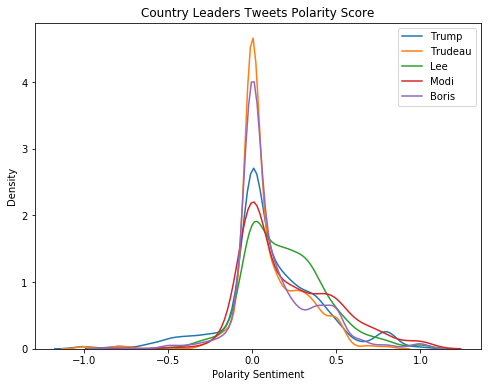

In [92]:
plt.figure(1, figsize=(8,6))
sns.distplot(trump_tweets['polarity'],label='Trump',hist=False,kde=True)
sns.distplot(trudeau_tweets['polarity'],label='Trudeau',hist=False,kde=True)
sns.distplot(lee_tweets['polarity'],label='Lee',hist=False,kde=True)
sns.distplot(modi_tweets['polarity'],label='Modi',hist=False,kde=True)
sns.distplot(boris_tweets['polarity'],label='Boris',hist=False,kde=True)
plt.ylabel('Density')
plt.xlabel('Polarity Sentiment')
plt.title('Country Leaders Tweets Polarity Score')
plt.legend()
#plt.savefig('Country Leaders Tweets Polarity Score.png')

In [35]:
print(len(boris_tweets[boris_tweets.polarity<0]))
print(len(trump_tweets[trump_tweets.polarity<0]))
print(len(trudeau_tweets[trudeau_tweets.polarity<0]))
print(len(modi_tweets[modi_tweets.polarity<0]))
print(len(lee_tweets[lee_tweets.polarity<0]))

45
108
51
50
72


In [36]:
neg = [len(boris_tweets[boris_tweets.polarity<0]),
      len(trump_tweets[trump_tweets.polarity<0]),
      len(trudeau_tweets[trudeau_tweets.polarity<0]),
      len(modi_tweets[modi_tweets.polarity<0]),
      len(lee_tweets[lee_tweets.polarity<0])]

In [37]:
pos = [len(boris_tweets[boris_tweets.polarity>0]),
      len(trump_tweets[trump_tweets.polarity>0]),
      len(trudeau_tweets[trudeau_tweets.polarity>0]),
      len(modi_tweets[modi_tweets.polarity>0]),
      len(lee_tweets[lee_tweets.polarity>0])]

In [38]:
neu = [len(boris_tweets[boris_tweets.polarity==0]),
      len(trump_tweets[trump_tweets.polarity==0]),
      len(trudeau_tweets[trudeau_tweets.polarity==0]),
      len(modi_tweets[modi_tweets.polarity==0]),
      len(lee_tweets[lee_tweets.polarity==0])]

In [39]:
name = ['boris','trump','trudeau','modi','lee']

In [40]:
df_polarity = pd.DataFrame([name,neg,neu,pos]).rename({0:'Name',1:'Negative',2:'Neutral',3:'Positive'}).transpose()
df_polarity.head()

,Name,Negative,Neutral,Positive
0,boris,45,241,257
1,trump,108,170,358
2,trudeau,51,277,251
3,modi,50,233,361
4,lee,72,147,558


In [41]:
df_polarity['Neg_p'] = (df_polarity['Negative']/(df_polarity['Negative']+df_polarity['Neutral']+df_polarity['Positive']))*100
df_polarity['Neu_p'] = (df_polarity['Neutral']/(df_polarity['Negative']+df_polarity['Neutral']+df_polarity['Positive']))*100
df_polarity['Pos_p'] = (df_polarity['Positive']/(df_polarity['Negative']+df_polarity['Neutral']+df_polarity['Positive']))*100
df_polarity.head()

,Name,Negative,Neutral,Positive,Neg_p,Neu_p,Pos_p
0,boris,45,241,257,8.28729,44.3831,47.3297
1,trump,108,170,358,16.9811,26.7296,56.2893
2,trudeau,51,277,251,8.80829,47.8411,43.3506
3,modi,50,233,361,7.76398,36.1801,56.0559
4,lee,72,147,558,9.26641,18.9189,71.8147


In [42]:
df_polarity2 = df_polarity.drop(columns=['Negative','Neutral','Positive'])
df_polarity2.head()

,Name,Neg_p,Neu_p,Pos_p
0,boris,8.28729,44.3831,47.3297
1,trump,16.9811,26.7296,56.2893
2,trudeau,8.80829,47.8411,43.3506
3,modi,7.76398,36.1801,56.0559
4,lee,9.26641,18.9189,71.8147


In [43]:
df_polarity_stack = pd.DataFrame(df_polarity2.set_index('Name').stack()).reset_index()
df_polarity_stack = df_polarity_stack.rename(columns={'level_1':'Polarity',0:'Frequency'})
df_polarity_stack.head()

,Name,Polarity,Frequency
0,boris,Neg_p,8.28729
1,boris,Neu_p,44.3831
2,boris,Pos_p,47.3297
3,trump,Neg_p,16.9811
4,trump,Neu_p,26.7296


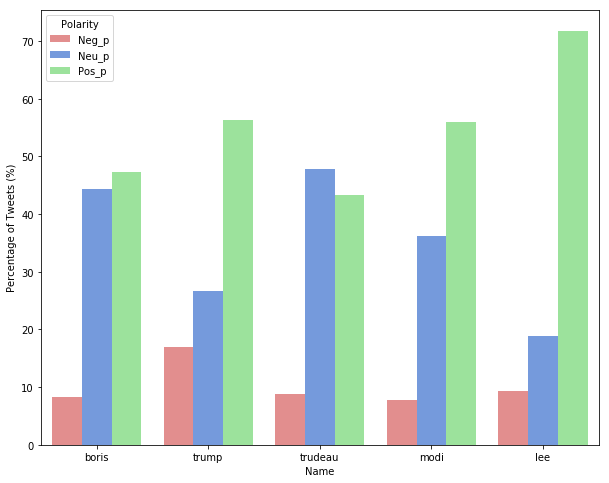

In [44]:
plt.figure(figsize=(10, 8))
sns.barplot(x="Name", hue="Polarity", y='Frequency', data=df_polarity_stack, palette={'Neg_p':'lightcoral','Neu_p':'cornflowerblue','Pos_p':'lightgreen'})
plt.ylabel('Percentage of Tweets (%)')
plt.show()

In [45]:
print(len(trump_tweets))
print(len(modi_tweets))
print(len(boris_tweets))
print(len(lee_tweets))
print(len(trudeau_tweets))

636
644
543
777
579


In [46]:
trump_tweets['date'] = [i.date() for i in trump_tweets.timestamp]
trump_tweets['for_count'] = 1
trump_tweets.head()

,username,text,timestamp,likes,retweets,text_clean,polarity,date,for_count
0,Mark Knoller,"""You became brothers & sisters pledging allegi...",2020-06-13 15:00:43,6504.0,1836.0,you became brothers sisters pledging allegian...,0.15,2020-06-13,1
1,Mark Knoller,Pres begins Commencement Address to graduating...,2020-06-13 14:51:17,4803.0,1201.0,pres begins commencement address to graduating...,0.80,2020-06-13,1
2,Mark Knoller,Pres escorted on stage and salutes as Star Spa...,2020-06-13 14:32:19,6509.0,1519.0,pres escorted on stage and salutes as star spa...,0.00,2020-06-13,1
3,Mark Knoller,Pres Trump and Gen Williams giving more than 5...,2020-06-13 16:11:21,6459.0,1633.0,pres trump and gen williams giving more than 5...,0.50,2020-06-13,1
4,Donald J. Trump,A great day at West Point!https://twitter.com/...,2020-06-14 03:26:00,29442.0,6341.0,a great day at west point,0.80,2020-06-14,1


In [47]:
modi_tweets['date'] = [i.date() for i in modi_tweets.timestamp]
modi_tweets['for_count'] = 1
modi_tweets.head()

,username,text,timestamp,likes,retweets,text_clean,polarity,date,for_count
0,Narendra Modi,Your ideas have always been the strength of #M...,2020-06-14 03:28:26,5988.0,1080.0,your ideas have always been the strength of ma...,0.083333,2020-06-14,1
1,Narendra Modi,This monthâ€™s #MannKiBaat will take place on ...,2020-06-14 03:27:51,14832.0,2082.0,this months mannkibaat will take place on the ...,0.350000,2020-06-14,1
2,Narendra Modi,Reviewed the COVID-19 situation across the nat...,2020-06-13 13:53:45,37473.0,5433.0,reviewed the covid19 situation across the nati...,0.330000,2020-06-13,1
3,Narendra Modi,Birthday greetings to my energetic Cabinet col...,2020-06-13 03:03:47,79210.0,7877.0,birthday greetings to my energetic cabinet col...,0.387500,2020-06-13,1
4,Narendra Modi,Had a good talk with President @MagufuliJP on ...,2020-06-12 16:10:12,28436.0,3737.0,had a good talk with president magufulijp on a...,0.537500,2020-06-12,1


In [48]:
lee_tweets['date'] = [i.date() for i in lee_tweets.timestamp]
lee_tweets['for_count'] = 1
lee_tweets.head()

,username,text,timestamp,likes,retweets,text_clean,polarity,date,for_count
0,leehsienloong,Our peopleâ€™s spirit of fortitude in the face...,2020-06-13 05:35:30,234.0,51.0,our peoples spirit of fortitude in the face of...,-0.200000,2020-06-13,1
1,leehsienloong,Caught up with the different teams of the Inte...,2020-06-12 14:37:06,258.0,30.0,caught up with the different teams of the inte...,-0.030000,2020-06-12,1
2,leehsienloong,The post-COVID-19 world will present us many e...,2020-06-11 11:55:55,221.0,43.0,the postcovid19 world will present us many ext...,0.300000,2020-06-11,1
3,leehsienloong,Greener ways to stay cool in Singapore. This B...,2020-06-11 02:01:00,484.0,104.0,greener ways to stay cool in singapore this bl...,0.233333,2020-06-11,1
4,leehsienloong,.@LawrenceWongST outlined our long-term plans ...,2020-06-09 11:57:02,202.0,33.0,lawrencewongst outlined our longterm plans to ...,0.324242,2020-06-09,1


In [49]:
trudeau_tweets['date'] = [i.date() for i in trudeau_tweets.timestamp]
trudeau_tweets['for_count'] = 1
trudeau_tweets.head()

,username,text,timestamp,likes,retweets,text_clean,polarity,date,for_count
0,Justin Trudeau,"Still the champs! A lot can happen in a year, ...",2020-06-13 16:49:03,8194.0,1121.0,still the champs a lot can happen in a year bu...,0.800000,2020-06-13,1
1,Justin Trudeau,Toujours les champions! Bien des choses peuven...,2020-06-13 16:48:54,566.0,56.0,toujours les champions bien des choses peuvent...,0.000000,2020-06-13,1
2,Justin Trudeau,COVID-19 is a global crisis that demands a glo...,2020-06-13 03:01:49,800.0,151.0,covid19 is a global crisis that demands a glob...,0.071429,2020-06-13,1
3,Justin Trudeau,La COVID-19 est une crise mondiale qui exige u...,2020-06-13 03:01:29,190.0,30.0,la covid19 est une crise mondiale qui exige un...,0.000000,2020-06-13,1
4,Justin Trudeau,"On our call earlier this evening, President @N...",2020-06-13 01:17:46,478.0,92.0,on our call earlier this evening president nit...,0.000000,2020-06-13,1


In [50]:
boris_tweets['date'] = [i.date() for i in boris_tweets.timestamp]
boris_tweets['for_count'] = 1
boris_tweets.head()

,username,text,timestamp,likes,retweets,text_clean,polarity,date,for_count
0,Boris Johnson #StayAlert,Everyone has a role to play in helping to cont...,2020-05-10 11:09:09,23242.0,6488.0,everyone has a role to play in helping to cont...,0.000000,2020-05-10,1
1,Boris Johnson #StayAlert,Racist thuggery has no place on our streets. A...,2020-06-13 18:27:07,49269.0,7573.0,racist thuggery has no place on our streets an...,0.175000,2020-06-13,1
2,Boris Johnson #StayAlert,The statue of Winston Churchill in Parliament ...,2020-06-12 10:25:38,104017.0,21143.0,the statue of winston churchill in parliament ...,0.200000,2020-06-12,1
3,Boris Johnson #StayAlert,We must all continue to remember those on the ...,2020-06-10 08:23:16,10031.0,1272.0,we must all continue to remember those on the ...,-0.071429,2020-06-10,1
4,Boris Johnson #StayAlert,"I want to say thank you, from the bottom of my...",2020-06-09 08:49:40,14177.0,1504.0,i want to say thank you from the bottom of my ...,0.000000,2020-06-09,1


In [51]:
trump_perday = trump_tweets.groupby('date').sum()[-8:-1].for_count.mean()
modi_perday = modi_tweets.groupby('date').sum()[-8:-1].for_count.mean()
trudeau_perday = trudeau_tweets.groupby('date').sum()[-8:-1].for_count.mean()
boris_perday = boris_tweets.groupby('date').sum()[-8:-1].for_count.mean()
lee_perday = lee_tweets.groupby('date').sum()[-8:-1].for_count.mean()

In [52]:
tweets_perday = [trump_perday,modi_perday,trudeau_perday,boris_perday,lee_perday]

In [53]:
tweets_perday = [boris_perday,trump_perday,trudeau_perday,modi_perday,lee_perday]

In [54]:
df_tweets_perday = pd.DataFrame([name,tweets_perday]).transpose().rename(columns={0:'Name',1:'Tweets_per_day'})
df_tweets_perday

,Name,Tweets_per_day
0,boris,2.85714
1,trump,25.1429
2,trudeau,13.1429
3,modi,2.28571
4,lee,1.42857


Text(0, 0.5, 'Name')

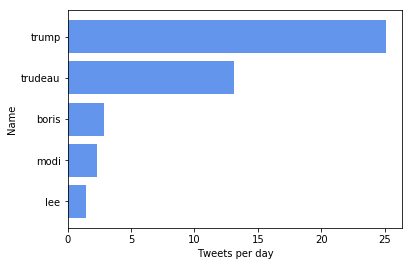

In [55]:
df_tweets_perday.sort_values('Tweets_per_day',inplace=True)
plt.barh(df_tweets_perday.Name,df_tweets_perday.Tweets_per_day,color='cornflowerblue',align='center')
plt.xlabel('Tweets per day')
plt.ylabel('Name')

In [56]:
trump_tweets.head(3)

,username,text,timestamp,likes,retweets,text_clean,polarity,date,for_count
0,Mark Knoller,"""You became brothers & sisters pledging allegi...",2020-06-13 15:00:43,6504.0,1836.0,you became brothers sisters pledging allegian...,0.15,2020-06-13,1
1,Mark Knoller,Pres begins Commencement Address to graduating...,2020-06-13 14:51:17,4803.0,1201.0,pres begins commencement address to graduating...,0.80,2020-06-13,1
2,Mark Knoller,Pres escorted on stage and salutes as Star Spa...,2020-06-13 14:32:19,6509.0,1519.0,pres escorted on stage and salutes as star spa...,0.00,2020-06-13,1


In [57]:
trump_tweets2 = trump_tweets[trump_tweets.username == 'Donald J. Trump'].reset_index(drop=True)
trump_tweets2.head()

,username,text,timestamp,likes,retweets,text_clean,polarity,date,for_count
0,Donald J. Trump,A great day at West Point!https://twitter.com/...,2020-06-14 03:26:00,29442.0,6341.0,a great day at west point,0.800000,2020-06-14,1
1,Donald J. Trump,The ramp that I descended after my West Point ...,2020-06-14 02:57:43,78488.0,14622.0,the ramp that i descended after my west point ...,0.067944,2020-06-14,1
2,Donald J. Trump,And it looks like the NFL is heading in that d...,2020-06-13 21:17:58,81294.0,22379.0,and it looks like the nfl is heading in that d...,0.000000,2020-06-13,1
3,Donald J. Trump,I wonâ€™t be watching much anymore!https://twi...,2020-06-13 21:13:22,84341.0,18253.0,i wont be watching much anymore,0.200000,2020-06-13,1
4,Donald J. Trump,Tonight at 9:00 P.M. (Eastern).https://twitter...,2020-06-13 21:12:20,29162.0,8221.0,tonight at 900 pm eastern,0.000000,2020-06-13,1


In [58]:
len(trump_tweets2)

337

In [59]:
modi_tweets.head(3)

,username,text,timestamp,likes,retweets,text_clean,polarity,date,for_count
0,Narendra Modi,Your ideas have always been the strength of #M...,2020-06-14 03:28:26,5988.0,1080.0,your ideas have always been the strength of ma...,0.083333,2020-06-14,1
1,Narendra Modi,This monthâ€™s #MannKiBaat will take place on ...,2020-06-14 03:27:51,14832.0,2082.0,this months mannkibaat will take place on the ...,0.350000,2020-06-14,1
2,Narendra Modi,Reviewed the COVID-19 situation across the nat...,2020-06-13 13:53:45,37473.0,5433.0,reviewed the covid19 situation across the nati...,0.330000,2020-06-13,1


In [60]:
modi_tweets2 = modi_tweets[modi_tweets.username == 'Narendra Modi'].reset_index(drop=True)
modi_tweets2.head()

,username,text,timestamp,likes,retweets,text_clean,polarity,date,for_count
0,Narendra Modi,Your ideas have always been the strength of #M...,2020-06-14 03:28:26,5988.0,1080.0,your ideas have always been the strength of ma...,0.083333,2020-06-14,1
1,Narendra Modi,This monthâ€™s #MannKiBaat will take place on ...,2020-06-14 03:27:51,14832.0,2082.0,this months mannkibaat will take place on the ...,0.350000,2020-06-14,1
2,Narendra Modi,Reviewed the COVID-19 situation across the nat...,2020-06-13 13:53:45,37473.0,5433.0,reviewed the covid19 situation across the nati...,0.330000,2020-06-13,1
3,Narendra Modi,Birthday greetings to my energetic Cabinet col...,2020-06-13 03:03:47,79210.0,7877.0,birthday greetings to my energetic cabinet col...,0.387500,2020-06-13,1
4,Narendra Modi,Had a good talk with President @MagufuliJP on ...,2020-06-12 16:10:12,28436.0,3737.0,had a good talk with president magufulijp on a...,0.537500,2020-06-12,1


In [61]:
len(modi_tweets2)

637

In [62]:
trudeau_tweets.head(3)

,username,text,timestamp,likes,retweets,text_clean,polarity,date,for_count
0,Justin Trudeau,"Still the champs! A lot can happen in a year, ...",2020-06-13 16:49:03,8194.0,1121.0,still the champs a lot can happen in a year bu...,0.800000,2020-06-13,1
1,Justin Trudeau,Toujours les champions! Bien des choses peuven...,2020-06-13 16:48:54,566.0,56.0,toujours les champions bien des choses peuvent...,0.000000,2020-06-13,1
2,Justin Trudeau,COVID-19 is a global crisis that demands a glo...,2020-06-13 03:01:49,800.0,151.0,covid19 is a global crisis that demands a glob...,0.071429,2020-06-13,1


In [63]:
trudeau_tweets2 = trudeau_tweets[trudeau_tweets.username == 'Justin Trudeau'].reset_index(drop=True)
trudeau_tweets2.head()

,username,text,timestamp,likes,retweets,text_clean,polarity,date,for_count
0,Justin Trudeau,"Still the champs! A lot can happen in a year, ...",2020-06-13 16:49:03,8194.0,1121.0,still the champs a lot can happen in a year bu...,0.800000,2020-06-13,1
1,Justin Trudeau,Toujours les champions! Bien des choses peuven...,2020-06-13 16:48:54,566.0,56.0,toujours les champions bien des choses peuvent...,0.000000,2020-06-13,1
2,Justin Trudeau,COVID-19 is a global crisis that demands a glo...,2020-06-13 03:01:49,800.0,151.0,covid19 is a global crisis that demands a glob...,0.071429,2020-06-13,1
3,Justin Trudeau,La COVID-19 est une crise mondiale qui exige u...,2020-06-13 03:01:29,190.0,30.0,la covid19 est une crise mondiale qui exige un...,0.000000,2020-06-13,1
4,Justin Trudeau,"On our call earlier this evening, President @N...",2020-06-13 01:17:46,478.0,92.0,on our call earlier this evening president nit...,0.000000,2020-06-13,1


In [64]:
len(trudeau_tweets2)

308

In [65]:
boris_tweets.head(3)

,username,text,timestamp,likes,retweets,text_clean,polarity,date,for_count
0,Boris Johnson #StayAlert,Everyone has a role to play in helping to cont...,2020-05-10 11:09:09,23242.0,6488.0,everyone has a role to play in helping to cont...,0.000,2020-05-10,1
1,Boris Johnson #StayAlert,Racist thuggery has no place on our streets. A...,2020-06-13 18:27:07,49269.0,7573.0,racist thuggery has no place on our streets an...,0.175,2020-06-13,1
2,Boris Johnson #StayAlert,The statue of Winston Churchill in Parliament ...,2020-06-12 10:25:38,104017.0,21143.0,the statue of winston churchill in parliament ...,0.200,2020-06-12,1


In [66]:
boris_tweets2 = boris_tweets[boris_tweets.username == 'Boris Johnson #StayAlert'].reset_index(drop=True)
boris_tweets2.head()

,username,text,timestamp,likes,retweets,text_clean,polarity,date,for_count
0,Boris Johnson #StayAlert,Everyone has a role to play in helping to cont...,2020-05-10 11:09:09,23242.0,6488.0,everyone has a role to play in helping to cont...,0.000000,2020-05-10,1
1,Boris Johnson #StayAlert,Racist thuggery has no place on our streets. A...,2020-06-13 18:27:07,49269.0,7573.0,racist thuggery has no place on our streets an...,0.175000,2020-06-13,1
2,Boris Johnson #StayAlert,The statue of Winston Churchill in Parliament ...,2020-06-12 10:25:38,104017.0,21143.0,the statue of winston churchill in parliament ...,0.200000,2020-06-12,1
3,Boris Johnson #StayAlert,We must all continue to remember those on the ...,2020-06-10 08:23:16,10031.0,1272.0,we must all continue to remember those on the ...,-0.071429,2020-06-10,1
4,Boris Johnson #StayAlert,"I want to say thank you, from the bottom of my...",2020-06-09 08:49:40,14177.0,1504.0,i want to say thank you from the bottom of my ...,0.000000,2020-06-09,1


In [67]:
len(boris_tweets2)

401

In [68]:
lee_tweets.head(3)

,username,text,timestamp,likes,retweets,text_clean,polarity,date,for_count
0,leehsienloong,Our peopleâ€™s spirit of fortitude in the face...,2020-06-13 05:35:30,234.0,51.0,our peoples spirit of fortitude in the face of...,-0.20,2020-06-13,1
1,leehsienloong,Caught up with the different teams of the Inte...,2020-06-12 14:37:06,258.0,30.0,caught up with the different teams of the inte...,-0.03,2020-06-12,1
2,leehsienloong,The post-COVID-19 world will present us many e...,2020-06-11 11:55:55,221.0,43.0,the postcovid19 world will present us many ext...,0.30,2020-06-11,1


In [69]:
lee_tweets2 = lee_tweets[lee_tweets.username == 'leehsienloong'].reset_index(drop=True)
lee_tweets2.head()

,username,text,timestamp,likes,retweets,text_clean,polarity,date,for_count
0,leehsienloong,Our peopleâ€™s spirit of fortitude in the face...,2020-06-13 05:35:30,234.0,51.0,our peoples spirit of fortitude in the face of...,-0.200000,2020-06-13,1
1,leehsienloong,Caught up with the different teams of the Inte...,2020-06-12 14:37:06,258.0,30.0,caught up with the different teams of the inte...,-0.030000,2020-06-12,1
2,leehsienloong,The post-COVID-19 world will present us many e...,2020-06-11 11:55:55,221.0,43.0,the postcovid19 world will present us many ext...,0.300000,2020-06-11,1
3,leehsienloong,Greener ways to stay cool in Singapore. This B...,2020-06-11 02:01:00,484.0,104.0,greener ways to stay cool in singapore this bl...,0.233333,2020-06-11,1
4,leehsienloong,.@LawrenceWongST outlined our long-term plans ...,2020-06-09 11:57:02,202.0,33.0,lawrencewongst outlined our longterm plans to ...,0.324242,2020-06-09,1


In [70]:
len(lee_tweets2)

774

In [71]:
name

['boris', 'trump', 'trudeau', 'modi', 'lee']

In [72]:
avg_likes = [boris_tweets2.likes.mean(),trump_tweets2.likes.mean(),trudeau_tweets2.likes.mean(),modi_tweets2.likes.mean(),lee_tweets2.likes.mean()]
avg_likes

[10667.306733167083,
 149133.72403560832,
 1727.7662337662337,
 55185.70957613815,
 269.88759689922483]

In [73]:
avg_rt = [boris_tweets2.retweets.mean(),trump_tweets2.retweets.mean(),trudeau_tweets2.retweets.mean(),modi_tweets2.retweets.mean(),lee_tweets2.retweets.mean()]
avg_rt

[1766.7955112219452,
 32782.528189910976,
 264.85064935064935,
 8128.417582417583,
 60.428940568475454]

In [74]:
df_avg = pd.DataFrame([name,avg_likes,avg_rt]).transpose().rename(columns={0:'Name',1:'Like_Average',2:'Retweet_Average'})
df_avg

,Name,Like_Average,Retweet_Average
0,boris,10667.3,1766.8
1,trump,149134,32782.5
2,trudeau,1727.77,264.851
3,modi,55185.7,8128.42
4,lee,269.888,60.4289


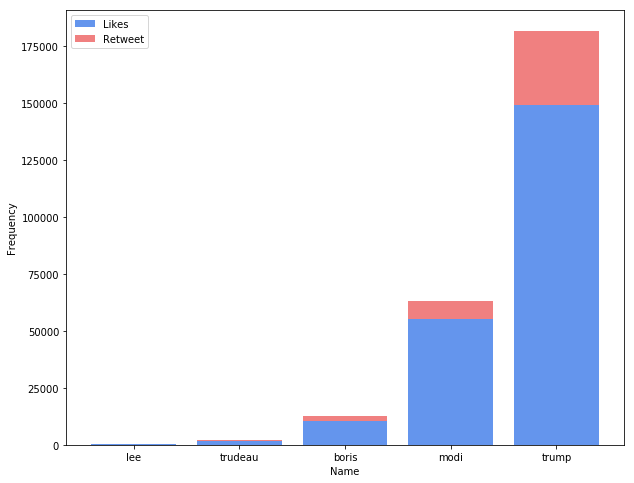

In [75]:
df_avg.sort_values('Like_Average',inplace=True)

plt.figure(figsize=(10, 8))

plt.bar(df_avg.Name, df_avg.Like_Average, label='Likes',color='cornflowerblue')
plt.bar(df_avg.Name, df_avg.Retweet_Average, bottom=df_avg.Like_Average,label='Retweet',color='lightcoral')

plt.ylabel('Frequency')
plt.xlabel('Name')
plt.legend()

plt.show()

In [76]:
df_avg.drop(index=1).mean()

Like_Average       16962.667535
Retweet_Average     2555.123171
dtype: float64

In [77]:
149134/16962.667535

8.79189547824855

In [78]:
32782.5/2555.123171

12.830105558930802

In [82]:
sum_tweets = len(trump_tweets) + len(trudeau_tweets) + len(modi_tweets) + len(boris_tweets) + len(lee_tweets)

In [84]:
print(len(trump_tweets)/sum_tweets)
print(len(trudeau_tweets)/sum_tweets)
print(len(modi_tweets)/sum_tweets)
print(len(boris_tweets)/sum_tweets)
print(len(lee_tweets)/sum_tweets)

0.20006291286568104
0.18213274614658698
0.2025794274929223
0.17080843032400125
0.24441648317080844
